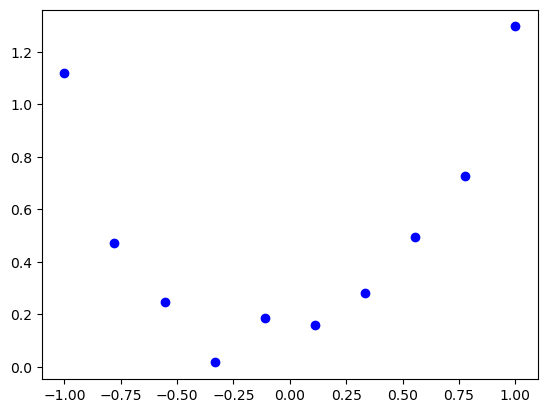

In [2]:
import numpy as np
import matplotlib.pyplot as plt

beta = np.array([.1, .1, 1])

xi = np.linspace(-1, 1, 10)

ti = beta[0] + beta[1]*xi + beta[2]*xi**2 + np.random.normal(0,0.1,len(xi))

plt.scatter(xi, ti, c='b')
plt.show()

In [3]:
X = np.vstack((xi**0, xi**1, xi**2)).T

print(X)

[[ 1.         -1.          1.        ]
 [ 1.         -0.77777778  0.60493827]
 [ 1.         -0.55555556  0.30864198]
 [ 1.         -0.33333333  0.11111111]
 [ 1.         -0.11111111  0.01234568]
 [ 1.          0.11111111  0.01234568]
 [ 1.          0.33333333  0.11111111]
 [ 1.          0.55555556  0.30864198]
 [ 1.          0.77777778  0.60493827]
 [ 1.          1.          1.        ]]


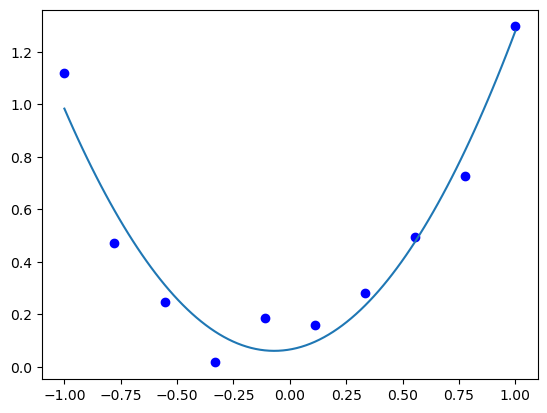

In [6]:
from sklearn.linear_model import LinearRegression

myreg = LinearRegression().fit(X, ti)

xtest = np.linspace(-1, 1, 100)

Xtest = np.vstack((xtest**0, xtest**1, xtest**2)).T

prediction = myreg.predict(Xtest)

plt.plot(xtest, prediction)
plt.scatter(xi, ti, c='b')
plt.show()

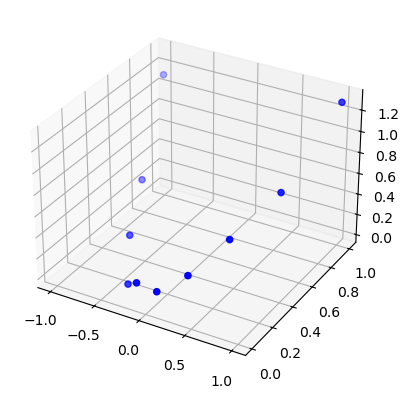

AttributeError: 'numpy.ndarray' object has no attribute 'resahpe'

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(xi, xi**2, ti, c='b')
plt.show()

x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-1, 1, 100)

xx1, xx2 = np.meshgrid(x1, x2)

XX = np.vstack((np.ones(np.shape(xx1.flatten())), xx1.flatten(), xx2.flatten())).T

prediction = myreg.predict(XX)
ax.plot_surface(xx1, xx2, prediction.resahpe)

Polynomial Features

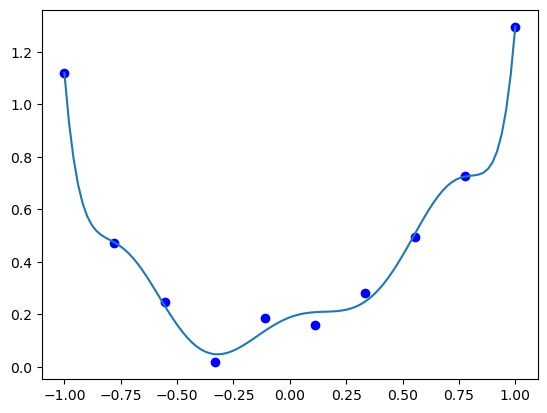

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=8)

xtest = np.linspace(-1, 1, 100)

poly_features = poly.fit_transform(xi.reshape(-1, 1))

poly_reg_model = LinearRegression().fit(poly_features, ti)

Xpoly_test = poly.fit_transform(xtest.reshape(-1, 1))

prediction = poly_reg_model.predict(Xpoly_test)

plt.scatter(xi, ti, c='b')
plt.plot(xtest, prediction)
plt.show()

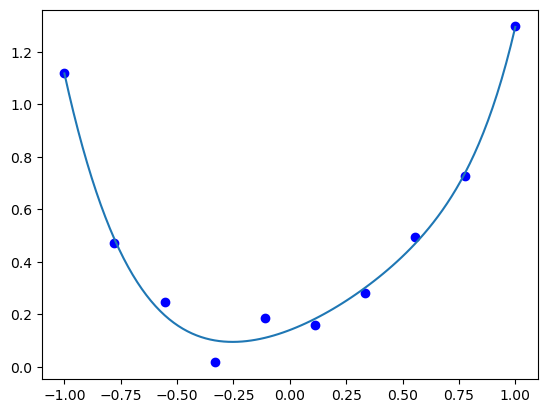

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

poly = PolynomialFeatures(degree=7)

xtest = np.linspace(-1, 1, 100)

poly_features = poly.fit_transform(xi.reshape(-1, 1))

model_ridge = Ridge(alpha=.0004).fit(poly_features, ti)

Xpoly_test = poly.fit_transform(xtest.reshape(-1, 1))

prediction = model_ridge.predict(Xpoly_test)

plt.scatter(xi, ti, c='b')
plt.plot(xtest, prediction)
plt.show()

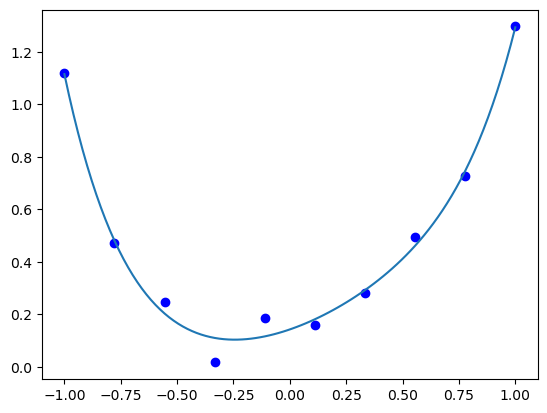

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso

poly = PolynomialFeatures(degree=7)

xtest = np.linspace(-1, 1, 100)

poly_features = poly.fit_transform(xi.reshape(-1, 1))

model_lasso = Lasso(alpha=.0004).fit(poly_features, ti)

Xpoly_test = poly.fit_transform(xtest.reshape(-1, 1))

prediction = model_lasso.predict(Xpoly_test)

plt.scatter(xi, ti, c='b')
plt.plot(xtest, prediction)
plt.show()

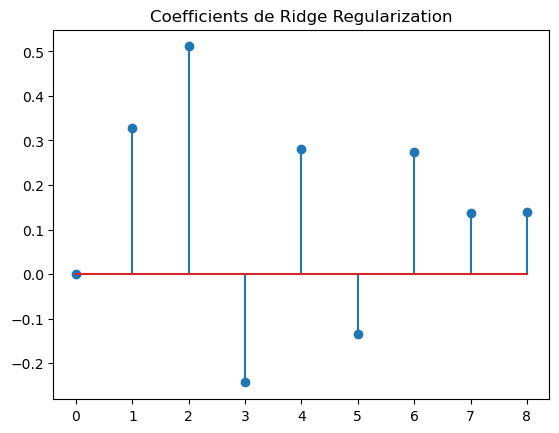

In [49]:
coeff = np.hstack((model_ridge.coef_, model_ridge.intercept_))
plt.stem(coeff)
plt.title('Coefficients de Ridge Regularization')
plt.show()

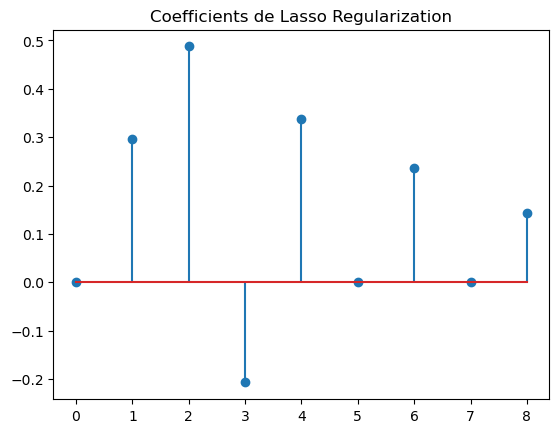

In [50]:
coeff = np.hstack((model_lasso.coef_, model_lasso.intercept_))
plt.stem(coeff)
plt.title('Coefficients de Lasso Regularization')
plt.show()

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.266e-02, tolerance: 1.485e-03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.595e-02, tolerance: 1.485e-03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.947e-02, toler

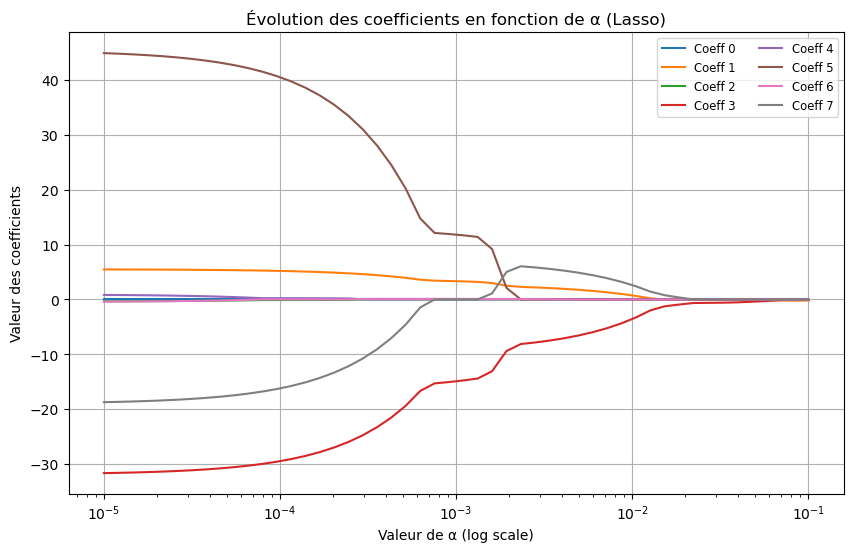

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso

# Tes données d'entraînement
# Remplace par tes propres données xi, ti
np.random.seed(0)
xi = np.linspace(-1, 1, 30)
ti = np.sin(2 * np.pi * xi) + 0.1 * np.random.randn(len(xi))

# Transformation polynomiale
poly = PolynomialFeatures(degree=7)
Xpoly = poly.fit_transform(xi.reshape(-1, 1))

# Liste de valeurs alpha à tester
alphas = np.logspace(-5, -1, 50)  # de 1e-5 à 1e-1

# Pour stocker les coefficients
coefs = []

for a in alphas:
    model = Lasso(alpha=a, max_iter=10000)
    model.fit(Xpoly, ti)
    coefs.append(model.coef_)

# Conversion en numpy array
coefs = np.array(coefs)

# --- Visualisation ---
plt.figure(figsize=(10, 6))
for i in range(coefs.shape[1]):
    plt.plot(alphas, coefs[:, i], label=f'Coeff {i}' if i < 8 else None)

plt.xscale('log')
plt.xlabel("Valeur de α (log scale)")
plt.ylabel("Valeur des coefficients")
plt.title("Évolution des coefficients en fonction de α (Lasso)")
plt.legend(loc='upper right', ncol=2, fontsize='small')
plt.grid(True)
plt.show()
